# Data 620 Final Project

Jimmy Ng, Corey Arnouts

In this final project, we decide to look at the recent stock market performance from the S&P 500. The first part of the analysis is to review the price movement by 11 sectors (from the S&P 500) from month to date, i.e. 2020-12-01 to 2020-12-11. There's a very strong up trend in the 'Energy' sector, whereas there's a considerable down trend in the 'Utilities' sector. We decide to do text mining and sentiment analysis by scraping Twitter for each stock from the S&P 500, date ranges from 2020-12-03 to 2020-12-14. We have gathered 100 to 200 tweets for each stock and then complied them into a csv that has over 50+ thousands unique, original tweets (no retweet) during this period. The second part of the analysis is about network analysis.

##### Part one presentation

https://www.youtube.com/watch?v=OxilOMy4q-0

#### Part Two Presentation

https://www.youtube.com/watch?v=ajlkiBzVfgc&feature=youtu.be&ab_channel=CoreyArnouts

# Part One: Text Mining plus Sentiment Analysis

## SET UP

### import module

In [1]:
import pandas as pd
import numpy as np
import os
import nltk
#nltk.download('wordnet')
#nltk.download('stopwords')
#nltk.download('vader_lexicon')
#nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import re
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
%matplotlib inline

In [2]:
# use 3 decimal places in output display
pd.set_option("display.precision", 3)

# do not wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

# set max rows displayed in output
pd.set_option("display.max_rows", 20)

# set max colwidth to show full text
pd.set_option('display.max_colwidth', -1)

C:\Users\arnou\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # This is added back by InteractiveShellApp.init_path()


### read data

In [3]:
sp500_df = pd.read_csv('https://raw.githubusercontent.com/myvioletrose/data620_team/master/project/final_project/stock_data_month_to_date_20201211.csv', encoding = "cp1252")
tDf = pd.read_csv('https://raw.githubusercontent.com/myvioletrose/data620_team/master/project/final_project/tweets_Df.csv', encoding = "cp1252", parse_dates = ['created'])

In [4]:
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symbol                502 non-null    object 
 1   company_name          502 non-null    object 
 2   sector                502 non-null    object 
 3   begin_20201201_price  502 non-null    float64
 4   end_20201211_price    502 non-null    float64
 5   percent_change        502 non-null    float64
 6   rank                  502 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 27.6+ KB


In [5]:
tDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71718 entries, 0 to 71717
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   sector         71718 non-null  object        
 1   symbol         71718 non-null  object        
 2   company_name   71718 non-null  object        
 3   id             71718 non-null  int64         
 4   text           71718 non-null  object        
 5   favoriteCount  71718 non-null  int64         
 6   retweetCount   71718 non-null  int64         
 7   created        71718 non-null  datetime64[ns]
 8   screenName     71718 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 4.9+ MB


In [6]:
sp500_df

,symbol,company_name,sector,begin_20201201_price,end_20201211_price,percent_change,rank
0,OXY,Occidental Petroleum,Energy,15.13,20.89,0.381,1
1,APA,Apache Corporation,Energy,12.37,16.10,0.302,2
2,FANG,Diamondback Energy,Energy,39.85,50.11,0.257,3
3,MRO,Marathon Oil Corp.,Energy,5.86,7.06,0.205,4
4,AAL,American Airlines Group,Industrials,14.27,17.05,0.195,5
...,...,...,...,...,...,...,...
497,BBY,Best Buy Co. Inc.,Consumer Discretionary,108.86,100.60,-0.076,498
498,CCI,Crown Castle International Corp.,Real Estate,170.80,157.68,-0.077,499
499,CRM,Salesforce.com,Information Technology,241.35,222.42,-0.078,500
500,CBOE,Cboe Global Markets,Financials,93.45,85.97,-0.080,501


In [7]:
tDf

,sector,symbol,company_name,id,text,favoriteCount,retweetCount,created,screenName
0,Communication Services,ATVI,Activision Blizzard,1334537346939686912,"Enter $baba jan15 300c 3.35ppc (1con)\r\n\r\ncurrently overextended in $ATVI with 6cons, will look to trim some on profit… https://t.co/IGrU41D6bI",0,0,2020-12-03 16:37:52,OptionsBruh
1,Communication Services,ATVI,Activision Blizzard,1334547061199527936,50 DMA Support today: $AFGD $AINC $AIRG $ATVI ... https://t.co/aW7zteKP9U,0,0,2020-12-03 17:16:28,SwingTradeBot
2,Communication Services,ATVI,Activision Blizzard,1334555851172925441,$ATVI in Uptrend: RSI indicator exits oversold zone. View odds for this and other indicators:… https://t.co/UKbBZLcrYQ,0,1,2020-12-03 17:51:24,Tickeron
3,Communication Services,ATVI,Activision Blizzard,1334555947365261320,$ATVI [D] - This is a tough breakout!\r\nMade with @TrendSpider \r\nhttps://t.co/mhw72Ffx9f,0,0,2020-12-03 17:51:47,KaladinTD
4,Communication Services,ATVI,Activision Blizzard,1334559945396776965,$ATVI a DUD as of now! still holding an 1/15 85c though hopefully a mid december/christmas pop!,0,0,2020-12-03 18:07:40,brick_mayer
...,...,...,...,...,...,...,...,...,...
71713,Utilities,XEL,Xcel Energy Inc,1337381626049949698,Short sale volume(not short interest) for $PCG on 2020-12-10 is 57%. https://t.co/q84zYVap97 $D 27% $AVA 59% $XEL 50%,0,0,2020-12-11 13:00:01,shortvolumes
71714,Utilities,XEL,Xcel Energy Inc,1337441203751677953,Oversold on Hourly \rhttps://t.co/2Hf0ZbjpKC \r$XEL 65.40 to 64.82 \r$ABMD 268.85 to 258.81 \r$GOLD 23.14 to 22.… https://t.co/YGTGWitmd1,0,0,2020-12-11 16:56:46,sleekoptions
71715,Utilities,XEL,Xcel Energy Inc,1337455987037495297,#Stocks trading with new monthly lows\r\n\r\n$DOYU $ADAP $JKS $HYLN $XP $HRB $AMT $NLS $XEL $WATT \r\n\r\n(+4 more results) Sc… https://t.co/qvUZUCAsRM,1,0,2020-12-11 17:55:30,stockbeep
71716,Utilities,XEL,Xcel Energy Inc,1337493807596589056,$TLRY To Release Details On Potential Acquisition Negotiations With Unnamed NYSE Traded Stock… https://t.co/D3xLsdKHrU,0,0,2020-12-11 20:25:47,FlyOnTheWallHQ


### price change (%) by sector MTD (month-to-date)

In [8]:
sp500_df.groupby('sector')['percent_change'].mean().sort_values(ascending = False)*100

sector
Energy                    13.568
Communication Services    1.755 
Industrials               1.218 
Information Technology    1.040 
Financials                0.965 
Health Care               0.466 
Real Estate               0.145 
Consumer Staples          0.069 
Consumer Discretionary   -0.183 
Materials                -0.260 
Utilities                -1.671 
Name: percent_change, dtype: float64

### 'Energy' sector

In [9]:
%%html
<img src = 'Energy_2020-12-11.png', width = 1200, height = 900>

### 'Utilities' sector

In [10]:
%%html
<img src = 'Utilities_2020-12-11.png', width = 1200, height = 900>

## TWEETS

### number of tweets by sector

Information Technology    11762
Industrials               9481 
Consumer Discretionary    9356 
Financials                8863 
Health Care               6956 
Communication Services    6423 
Consumer Staples          5241 
Utilities                 3774 
Energy                    3383 
Real Estate               3356 
Materials                 3123 
Name: sector, dtype: int64


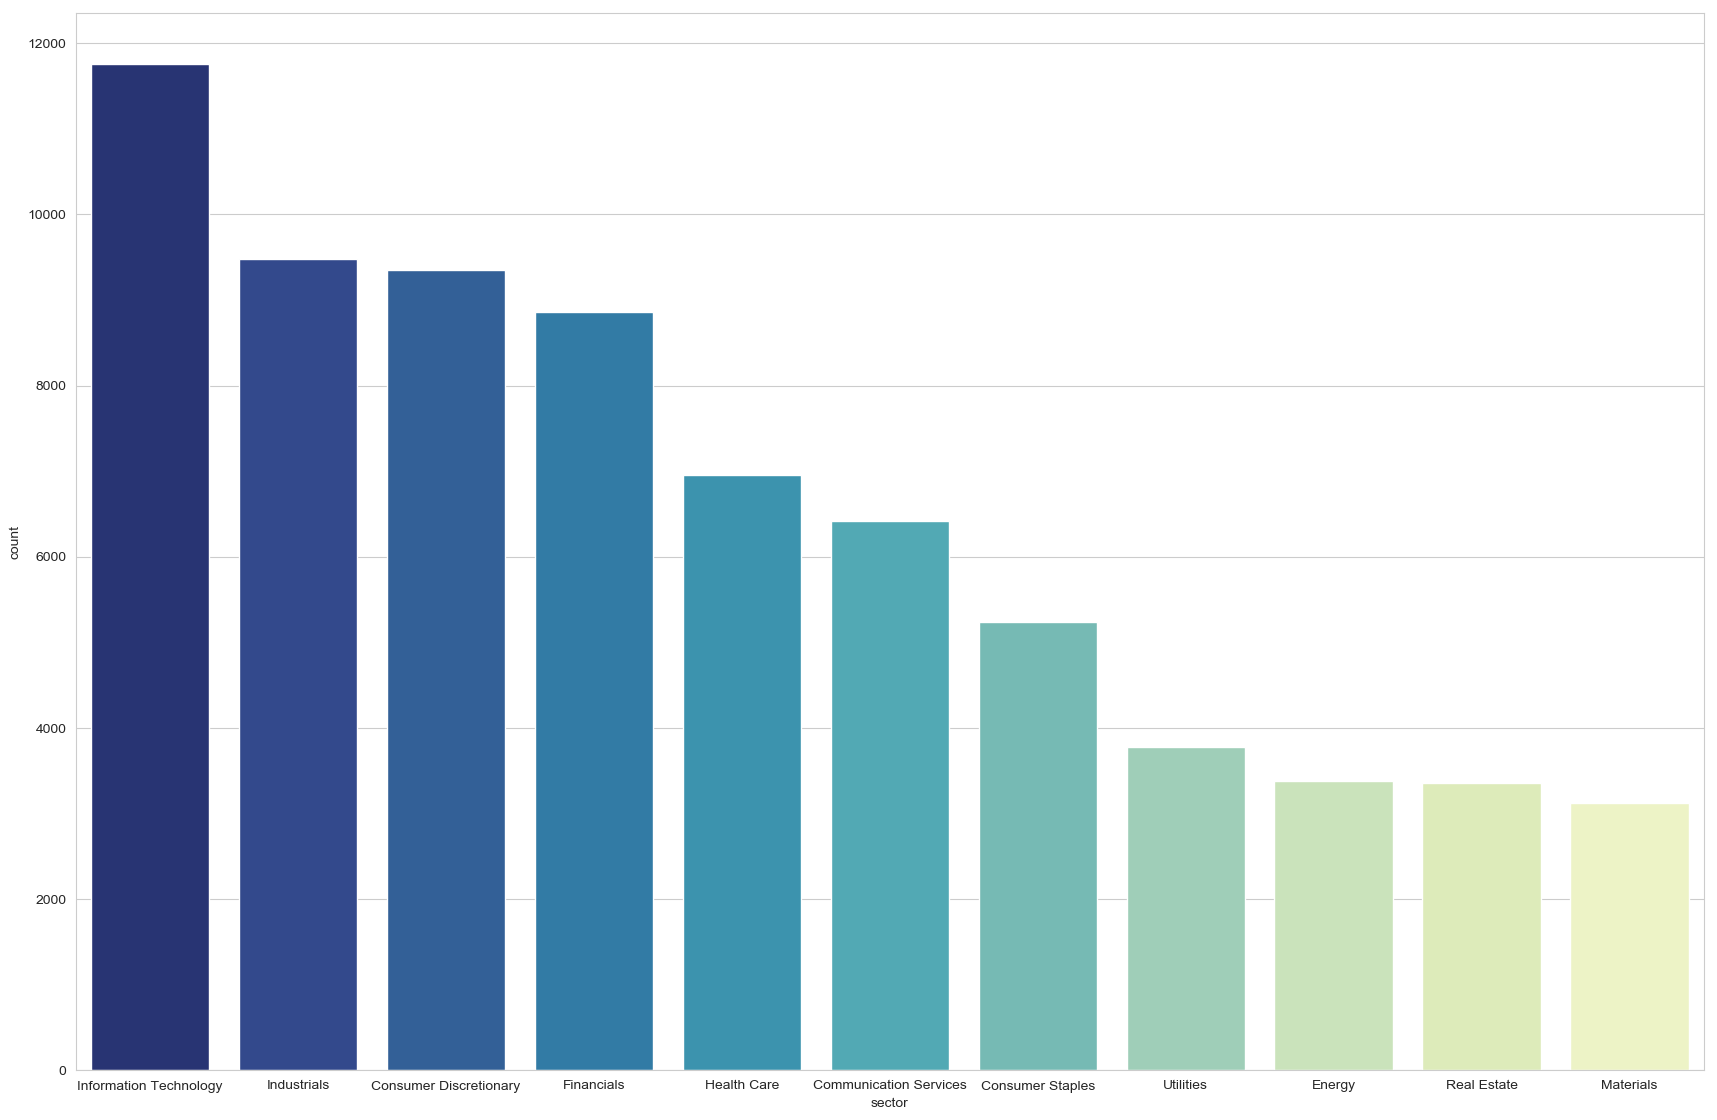

In [11]:
print(tDf['sector'].value_counts())

fig = plt.figure(figsize = (21, 14), dpi = 100)
sns.set_style('whitegrid')
sns.countplot(x = 'sector', data = tDf, palette = 'YlGnBu_r', order = tDf['sector'].value_counts().index)

### basic info

In [12]:
print("The data was collected from between", min(tDf.created), " and ", max(tDf.created))
print("The dataset has", len(tDf.screenName.unique()), "unique users.")
print("The dataset has", len(tDf.id.unique()), "unique tweets.")
print("The tweet with the most favorites had", tDf['favoriteCount'].max(), "favorites.")
print("The tweet with the most retweets had", tDf['retweetCount'].max(), "retweets.")

The data was collected from between 2020-12-03 16:10:58  and  2020-12-14 15:21:53
The dataset has 21327 unique users.
The dataset has 52918 unique tweets.
The tweet with the most favorites had 1267 favorites.
The tweet with the most retweets had 870 retweets.


### tidy text

In [13]:
def tidy_text(text):
        
    # remove hashtags
    step1 = text.str.replace("#[A-Za-z0-9]+", "")
    # remove urls
    step2 = step1.str.replace("https?://[A-Za-z0-9./]+", "")
    # remove screen names
    step3 = step2.str.replace("@[A-Za-z0-9]+", "")
    # lowercase the words
    step4 = step3.str.lower()
    # remove everything else but alphabets
    step5 = step4.str.replace("[^a-z]", " ")
    # tokenize the tweets
    step6 = step5.apply(lambda x: x.split())
    # remove stop words
    stop_words = stopwords.words('english')
    step7 = step6.apply(lambda x: [i for i in x if i not in stop_words])  
    # lemmatisation of words 
    lemma = nltk.WordNetLemmatizer()
    step8 = step7.apply(lambda x: [lemma.lemmatize(i) for i in x])  
    
    return step8

In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arnou\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
%%time
tDf["tidy_token"] = tidy_text(tDf.text)
tDf["tidy_text"] = tDf.tidy_token.apply(lambda x: " ".join(x))

Wall time: 6.94 s


In [16]:
tDf.head(500)

,sector,symbol,company_name,id,text,favoriteCount,retweetCount,created,screenName,tidy_token,tidy_text
0,Communication Services,ATVI,Activision Blizzard,1334537346939686912,"Enter $baba jan15 300c 3.35ppc (1con)\r\n\r\ncurrently overextended in $ATVI with 6cons, will look to trim some on profit… https://t.co/IGrU41D6bI",0,0,2020-12-03 16:37:52,OptionsBruh,"[enter, baba, jan, c, ppc, con, currently, overextended, atvi, con, look, trim, profit]",enter baba jan c ppc con currently overextended atvi con look trim profit
1,Communication Services,ATVI,Activision Blizzard,1334547061199527936,50 DMA Support today: $AFGD $AINC $AIRG $ATVI ... https://t.co/aW7zteKP9U,0,0,2020-12-03 17:16:28,SwingTradeBot,"[dma, support, today, afgd, ainc, airg, atvi]",dma support today afgd ainc airg atvi
2,Communication Services,ATVI,Activision Blizzard,1334555851172925441,$ATVI in Uptrend: RSI indicator exits oversold zone. View odds for this and other indicators:… https://t.co/UKbBZLcrYQ,0,1,2020-12-03 17:51:24,Tickeron,"[atvi, uptrend, rsi, indicator, exit, oversold, zone, view, odds, indicator]",atvi uptrend rsi indicator exit oversold zone view odds indicator
3,Communication Services,ATVI,Activision Blizzard,1334555947365261320,$ATVI [D] - This is a tough breakout!\r\nMade with @TrendSpider \r\nhttps://t.co/mhw72Ffx9f,0,0,2020-12-03 17:51:47,KaladinTD,"[atvi, tough, breakout, made]",atvi tough breakout made
4,Communication Services,ATVI,Activision Blizzard,1334559945396776965,$ATVI a DUD as of now! still holding an 1/15 85c though hopefully a mid december/christmas pop!,0,0,2020-12-03 18:07:40,brick_mayer,"[atvi, dud, still, holding, c, though, hopefully, mid, december, christmas, pop]",atvi dud still holding c though hopefully mid december christmas pop
...,...,...,...,...,...,...,...,...,...,...,...
495,Communication Services,DIS,The Walt Disney Company,1337177611529842690,Disney $DIS just announced Taika Waititi is working on an upcoming Star Wars film\r\n\r\nSource https://t.co/NHZVVjotqz https://t.co/7Co4ZPsb6s,2,1,2020-12-10 23:29:20,StockMKTNewz,"[disney, dis, announced, taika, waititi, working, upcoming, star, war, film, source]",disney dis announced taika waititi working upcoming star war film source
496,Communication Services,DIS,The Walt Disney Company,1337177670757601281,"Disney announced two Mandalorian spin-offs, along with two projects under development ""Lando"" and ""The Acolyte""… https://t.co/C69FnO4dP2",2,0,2020-12-10 23:29:34,TheStreamable,"[disney, announced, two, mandalorian, spin, offs, along, two, project, development, lando, acolyte]",disney announced two mandalorian spin offs along two project development lando acolyte
497,Communication Services,DIS,The Walt Disney Company,1337177991827296258,"""The best predictor of future behavior is past behavior."" -- Boardwalk Empire\r\n\r\n#Stock #stocks #investor #investment… https://t.co/OJu3WCKtgE",0,0,2020-12-10 23:30:51,ghostntmachine,"[best, predictor, future, behavior, past, behavior, boardwalk, empire]",best predictor future behavior past behavior boardwalk empire
498,Communication Services,DIS,The Walt Disney Company,1337178129463345152,Now THIS is great news. $DIS https://t.co/KHaYIa6QuJ,1,0,2020-12-10 23:31:24,pinkbunnyr,"[great, news, dis]",great news dis


### 'Energy' high freq word

In [17]:
energy = Counter()
for i in tDf[(tDf.sector == 'Energy')].tidy_token: energy.update(i)

hf_energy_words = pd.DataFrame(energy.most_common(), columns = ["word", "count"])
hf_energy_words["nchar"] = [len(word) for word in hf_energy_words.word]

# filter by words that at least has more than 3 characters
hf_energy_words[hf_energy_words.nchar >3][["word", "count"]].head(20).reset_index(drop = True)

,word,count
0,stock,1007
1,flow,463
2,today,292
3,sector,246
4,short,220
5,energy,204
6,like,196
7,market,187
8,sell,163
9,covid,143


### 'Utilities' high freq word

In [18]:
utilities = Counter()
for i in tDf[(tDf.sector == 'Utilities')].tidy_token: utilities.update(i)

hf_utilities_words = pd.DataFrame(utilities.most_common(), columns = ["word", "count"])
hf_utilities_words["nchar"] = [len(word) for word in hf_utilities_words.word]

# filter by words that at least has more than 3 characters
hf_utilities_words[hf_utilities_words.nchar >3][["word", "count"]].head(20).reset_index(drop = True)

,word,count
0,stock,1514
1,market,237
2,short,197
3,today,173
4,week,172
5,like,163
6,energy,156
7,company,125
8,price,117
9,flow,100


### 'Energy' word cloud 

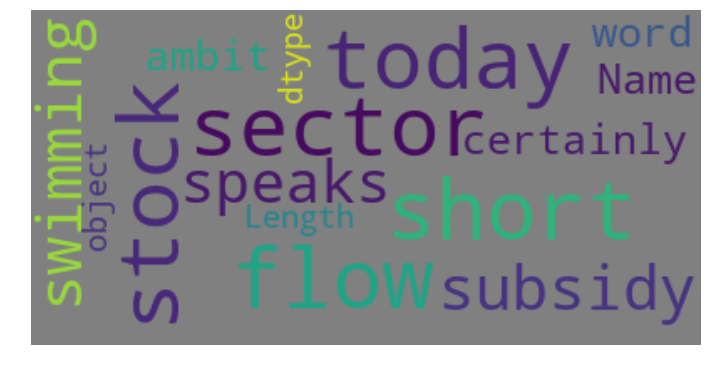

In [19]:
wordcloud = WordCloud(random_state = 1234, max_words = 100, max_font_size = 50, background_color = "grey")\
.generate(str(hf_energy_words.word[hf_energy_words.nchar >3]))
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

### 'Utilities' word cloud 

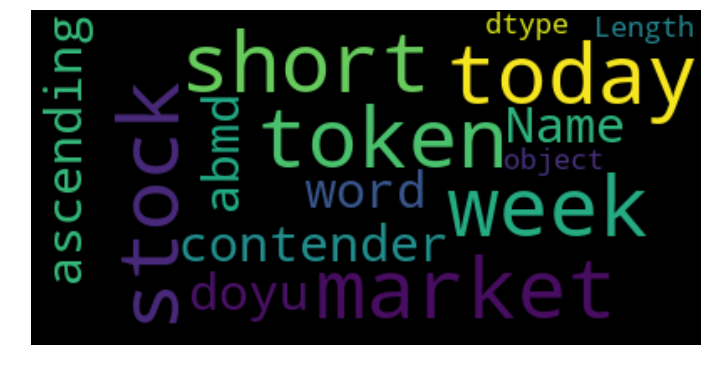

In [20]:
wordcloud2 = WordCloud(random_state = 1234, max_words = 100, max_font_size = 50, background_color = "black")\
.generate(str(hf_utilities_words.word[hf_utilities_words.nchar >3]))
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud2, interpolation = "bilinear")
plt.axis('off')
plt.show()

## SENTIMENT ANALYSIS

### sentiment score

In [21]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\arnou\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
sia = SentimentIntensityAnalyzer()

In [23]:
%%time

tDf['score'] = [sia.polarity_scores(tweet)["compound"] for tweet in tDf['tidy_text']]

Wall time: 8.84 s


### sentiment category

In [24]:
# classify sentiment into 5 distinct categories
tDf.loc[tDf['score'] > .6, 'sentiment'] = "1. extremely positive"
tDf.loc[(tDf['score'] > .2) & (tDf['score'] <= .6), 'sentiment'] = "2. positive"
tDf.loc[(tDf['score'] > -.2) & (tDf['score'] <= .2), 'sentiment'] = "3. neutral"
tDf.loc[(tDf['score'] > -.6) & (tDf['score'] <= -.2), 'sentiment'] = "4. negative"
tDf.loc[tDf['score'] <= -.6, 'sentiment'] = "5. extremely negative"

In [25]:
tDf[(tDf.id=="1337454889069326338")]


,sector,symbol,company_name,id,text,favoriteCount,retweetCount,created,screenName,tidy_token,tidy_text,score,sentiment


### distribution of sentiment

In [26]:
tDf.groupby( ["sector"] ).sentiment.value_counts(normalize = True)\
.to_frame(name = "percentage")\
.reset_index()\
.pivot(index = "sector", columns = "sentiment", values = "percentage")


sentiment,1. extremely positive,2. positive,3. neutral,4. negative,5. extremely negative
sector,,,,,
Communication Services,0.099,0.313,0.464,0.102,0.022
Consumer Discretionary,0.109,0.338,0.450,0.084,0.019
Consumer Staples,0.113,0.346,0.440,0.084,0.017
Energy,0.103,0.348,0.452,0.081,0.016
Financials,0.117,0.314,0.449,0.102,0.018
Health Care,0.104,0.330,0.465,0.080,0.021
Industrials,0.101,0.307,0.484,0.086,0.022
Information Technology,0.087,0.341,0.479,0.076,0.017
Materials,0.119,0.322,0.419,0.124,0.016


In [27]:
stocks_sentiment = tDf.groupby( ["symbol"] ).sentiment.value_counts(normalize = True)\
.to_frame(name = "percentage")\
.reset_index()\
.pivot(index = "symbol", columns = "sentiment", values = "percentage")

stocks_sentiment["5. extremely negative"] = stocks_sentiment["5. extremely negative"].fillna(0)
stocks_sentiment["4. negative"] = stocks_sentiment["4. negative"].fillna(0)

#stocks_sentiment['negative_sentiment'] = stocks_sentiment["4. negative"]+stocks_sentiment["5. extremely negative"]

stocks_sentiment.loc[(stocks_sentiment["1. extremely positive"]+stocks_sentiment["2. positive"]) > .4, 'sentiment_overall'] = "positive"
stocks_sentiment.loc[(stocks_sentiment["4. negative"]+(2*stocks_sentiment["5. extremely negative"])) > .4, 'sentiment_overall'] = "negative"

stocks_sentiment["sentiment_overall"] = stocks_sentiment["sentiment_overall"].fillna("neutral")



In [28]:
list(stocks_sentiment.columns.values)
stocks_sentiment['symbol'] = stocks_sentiment.index
list(stocks_sentiment.columns.values)
stocks_sentiment = stocks_sentiment[["symbol", "sentiment_overall"]]

### Creating a Stock Sentiment Dataset

In [29]:
pd.set_option('display.max_rows', 500)

stocks_sentiment2 = stocks_sentiment
stocks_sentiment2 = stocks_sentiment2.reset_index(drop=True)
stocks_sentiment2.head(500)

sentiment,symbol,sentiment_overall
0,A,neutral
1,AAL,neutral
2,AAP,positive
3,AAPL,neutral
4,ABBV,neutral
5,ABC,neutral
6,ABMD,negative
7,ABT,neutral
8,ACN,positive
9,ADBE,positive


### 'Energy' words associated with extremely positive/negative sentiment

In [30]:
energy_pos = Counter()
for i in tDf[(tDf.sector == 'Energy') & (tDf.sentiment == '1. extremely positive')].tidy_token: energy_pos.update(i)
energy_neg = Counter()
for i in tDf[(tDf.sector == 'Energy') & (tDf.sentiment == '5. extremely negative')].tidy_token: energy_neg.update(i)
    
hf_energy_pos = pd.DataFrame(energy_pos.most_common(), columns = ["word", "count"])
hf_energy_pos["nchar"] = [len(word) for word in hf_energy_pos.word]

hf_energy_neg = pd.DataFrame(energy_neg.most_common(), columns = ["word", "count"])
hf_energy_neg["nchar"] = [len(word) for word in hf_energy_neg.word]

#### unique, extremely positive word

In [31]:
hf_energy_pos[(hf_energy_pos.nchar >3) & (np.logical_not(hf_energy_pos.word.isin(hf_energy_neg.word)))]\
[["word", "count"]].head(20)\
.reset_index(drop = True)

,word,count
0,energy,69
1,best,54
2,last,33
3,great,32
4,sector,30
5,alert,22
6,follow,21
7,good,20
8,along,20
9,long,19


#### unique, extremely negative word

In [32]:
hf_energy_neg[(hf_energy_neg.nchar >3) & (np.logical_not(hf_energy_neg.word.isin(hf_energy_pos.word)))]\
[["word", "count"]].head(20)\
.reset_index(drop = True)

,word,count
0,terrorist,5
1,attack,5
2,karachi,5
3,stop,4
4,indian,4
5,explosive,4
6,hell,3
7,waiting,3
8,lost,3
9,suicide,3


### 'Utilities' words associated with extremely positive/negative sentiment

In [33]:
utilities_pos = Counter()
for i in tDf[(tDf.sector == 'Utilities') & (tDf.sentiment == '1. extremely positive')].tidy_token: utilities_pos.update(i)
utilities_neg = Counter()
for i in tDf[(tDf.sector == 'Utilities') & (tDf.sentiment == '5. extremely negative')].tidy_token: utilities_neg.update(i)
    
hf_utilities_pos = pd.DataFrame(utilities_pos.most_common(), columns = ["word", "count"])
hf_utilities_pos["nchar"] = [len(word) for word in hf_utilities_pos.word]

hf_utilities_neg = pd.DataFrame(utilities_neg.most_common(), columns = ["word", "count"])
hf_utilities_neg["nchar"] = [len(word) for word in hf_utilities_neg.word]

#### unique, extremely positive word

In [34]:
hf_utilities_pos[(hf_utilities_pos.nchar >3) & (np.logical_not(hf_utilities_pos.word.isin(hf_utilities_neg.word)))]\
[["word", "count"]].head(20)\
.reset_index(drop = True)

,word,count
0,best,43
1,energy,39
2,good,38
3,great,34
4,free,20
5,ready,19
6,love,18
7,long,15
8,term,13
9,share,13


#### unique, extremely negative word

In [35]:
hf_utilities_neg[(hf_utilities_neg.nchar >3) & (np.logical_not(hf_utilities_neg.word.isin(hf_utilities_pos.word)))]\
[["word", "count"]].head(20)\
.reset_index(drop = True)

,word,count
0,weapon,21
1,intense,21
2,defence,20
3,ammunition,20
4,lower,12
5,shit,8
6,uptrend,7
7,bollinger,7
8,band,7
9,view,7


# Part Two Network Analysis

https://www.youtube.com/watch?v=ajlkiBzVfgc&feature=youtu.be&ab_channel=CoreyArnouts

# Network Analysis of S & P 500 - all of 2020

In [36]:
# -*- coding: utf-8 -*-
"""
Created on Sun Dec  6 11:46:56 2020

@author: arnou
"""


import pandas as pd
import numpy as np
import os
import nltk
#nltk.download('wordnet')
#nltk.download('stopwords')
#nltk.download('vader_lexicon')
#nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import re
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

import networkx as nx
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import matplotlib
#%matplotlib inline
from itertools import count
import warnings
from pyvis import network as net

warnings.filterwarnings('ignore')

stocks = pd.read_csv('https://raw.githubusercontent.com/myvioletrose/data620_team/master/project/final_project/S_P_500_November_Data_v5.csv',encoding="ISO-8859-1")


## I would like to bring in the market cap of the stocks and then use this for the node size to get a sense of which stocks might be guiding the market


stocks2 = stocks

## merging stocks by a lagged basis
# I think I want the "source" stock to be the leading stock, so the source stock will be from the previous day


dates = stocks.loc[:,['datekey']]
dates['datekeydate']= pd.to_datetime(dates['datekey'])
dates = dates.drop_duplicates()
dates['date_rank'] = dates['datekeydate'].rank(method='max')
dates = dates.loc[:,['datekey','date_rank']]
dates['date_rank_lag'] = dates['date_rank']+1

stocks = pd.merge(stocks,dates, how = 'inner', right_on="datekey", left_on="datekey")
stocks2 = pd.merge(stocks2,dates, how = 'inner', right_on="datekey", left_on="datekey")

#stocks['dummy'] = 'Leading-'
#stocks['company_name']= stocks['dummy'].astype(str)+stocks['company_name'].astype(str)

## merging stock datasets to see patterns on which stocks fluctuate together
new_df = pd.merge(stocks, stocks2,  how='outer', left_on=['date_rank','direction'], right_on = ['date_rank','direction'])

# remove matches to itself
new_df = new_df[(new_df.symbol_x != new_df.symbol_y)]

new_df = new_df[(new_df.direction != "Same")]

new_df["name_one_length"] = new_df['company_name_x'].str.len()
new_df["name_two_length"] = new_df['company_name_y'].str.len()

new_df['symbol_one'] = new_df['symbol_x']
new_df['symbol_two'] = new_df['symbol_y']


new_df['company_name_one'] = new_df['company_name_x']
new_df['company_name_two'] = new_df['company_name_y']

new_df['sector_one'] = new_df['sector_x']
new_df['sector_two'] = new_df['sector_y']

new_df['datekey'] = new_df['datekey_x']

new_df = new_df.loc[:,['datekey','symbol_x', 'symbol_y','company_name_x','company_name_y','sector_x','sector_y','Market_Cap_x','Market_Cap_y']]


## Redefine variables based off whichever stock has the bigger market cap

## company one and company two are simply chosen based on the lenght of their name 
## could or should I do this by the bigger company?
## I have to do this for every variable in order for it to make sense
#####################################################################################################
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'symbol_one'] = new_df['symbol_x']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'symbol_one'] = new_df['symbol_y']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'symbol_two'] = new_df['symbol_x']
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'symbol_two'] = new_df['symbol_y']
#####################################################################################################
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'company_name_one'] = new_df['company_name_x']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'company_name_one'] = new_df['company_name_y']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'company_name_two'] = new_df['company_name_x']
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'company_name_two'] = new_df['company_name_y']
#####################################################################################################
#####################################################################################################
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'sector_one'] = new_df['sector_x']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'sector_one'] = new_df['sector_y']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'sector_two'] = new_df['sector_x']
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'sector_two'] = new_df['sector_y']
#####################################################################################################
#####################################################################################################
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'Market_Cap_one'] = new_df['Market_Cap_x']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'Market_Cap_one'] = new_df['Market_Cap_y']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'Market_Cap_two'] = new_df['Market_Cap_x']
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'Market_Cap_two'] = new_df['Market_Cap_y']
#####################################################################################################

# have to rename x and y based off of the new one and two company variables that are defined by whichever company has the bigger market cap

new_df['sector_x'] = new_df['sector_one']
new_df['sector_y'] = new_df['sector_two']

new_df['symbol_x'] = new_df['symbol_one']
new_df['symbol_y'] = new_df['symbol_two']

new_df['company_name_x'] = new_df['company_name_one'] 
new_df['company_name_y'] = new_df['company_name_two']

new_df['Market_Cap_x'] = new_df['Market_Cap_one'] 
new_df['Market_Cap_y'] = new_df['Market_Cap_two']
#######################################################################################################################################################

# choosing the data I want
new_df = new_df.loc[:,['datekey','symbol_x', 'symbol_y','company_name_x','company_name_y','sector_x','sector_y','Market_Cap_x','Market_Cap_y']]

new_df = new_df.drop_duplicates()

# I have to choose another variable to group by so I arbitrariliy choose sector_x
weights = new_df.loc[:,['symbol_x', 'symbol_y','sector_x']].groupby(['symbol_x', 'symbol_y']).count().reset_index()

weights.columns = ['symbol_x', 'symbol_y', 'freq']

new_df = new_df.loc[:,['symbol_x', 'symbol_y','company_name_x','company_name_y','sector_x','sector_y','Market_Cap_x','Market_Cap_y']]

new_df = new_df.drop_duplicates()


new_df= pd.merge(new_df, weights,  how='outer', left_on=['symbol_x','symbol_y'], right_on = ['symbol_x','symbol_y'])


new_df2 = new_df

maxdf = new_df2.groupby(['company_name_x'])['freq'].max()
max_df2 = new_df2.groupby(['company_name_x'], sort=False)['freq'].max()

new_df=new_df2

new_df['highest_freq_x']=new_df.groupby(['company_name_x'])['freq'].transform(max)
new_df['highest_freq_y']=new_df.groupby(['company_name_y'])['freq'].transform(max)
new_df['75_percentile_x']=new_df.groupby(['company_name_x'])['freq'].quantile(0.75)

new_df['highest_freq'] = new_df[['highest_freq_x','highest_freq_y']].min(axis=1)

new_df = new_df[(new_df.freq>60)] ## good view to see the tech giants



#######################################################################################################################################################################
#######################################################################################################################################################################
#######################################################################################################################################################################


class_net = net.Network(height="1000px", width="1000px", bgcolor="#222222",font_color="white",notebook=True)
# set the physics layout of the network
class_net.barnes_hut()


new_df['symbol_x'] = new_df.symbol_x.astype(str)
new_df['symbol_y'] = new_df.symbol_y.astype(str)
new_df['sector_x'] = new_df.sector_x.astype(str)
new_df['sector_y'] = new_df.sector_y.astype(str)
#new_df['dept'] = new_df.dept.astype(str)
#new_df['dept_2'] = new_df.dept_2.astype(str)


sources = new_df.iloc[:,2]
targets = new_df.iloc[:,3]
weights = new_df.iloc[:,8]
source_stocks = new_df.iloc[:,4]
target_stocks = new_df.iloc[:,5]
source_cap_sizes = new_df.iloc[:,6]
target_cap_sizes = new_df.iloc[:,7]
#source_class = new_df.iloc[:,4]
#target_class = new_df.iloc[:,6]
edge_data = zip(sources, targets, weights,source_stocks,target_stocks,source_cap_sizes,target_cap_sizes)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    srcgen = e[3]
    targen = e[4]
    srcsize = e[5]
    tarsize = e[6]
    #srcclass = e[5]
    #tarclass = e[6]
    
    class_net.add_node(src, src, title=src, group = (srcgen),value = srcsize)
    class_net.add_node(dst, dst, title=dst, group = (targen), value = tarsize)
    class_net.add_edge(src, dst, value=w)


neighbor_map = class_net.get_adj_list()
# add neighbor data to node hover data
for node in class_net.nodes:
    node["title"] = node["group"]+ " " + node["title"] + "'s Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    #node["value"] = len(neighbor_map[node["id"]])
    





In [37]:
new_df.head(500)

,symbol_x,symbol_y,company_name_x,company_name_y,sector_x,sector_y,Market_Cap_x,Market_Cap_y,freq,highest_freq_x,highest_freq_y,75_percentile_x,highest_freq
4,AAL,HFC,American Airlines Group,HollyFrontier Corp,Industrials,Energy,1.002e+10,4.626e+09,61,81,83,NaN,81
25,DXC,HFC,DXC Technology,HollyFrontier Corp,Information Technology,Energy,6.348e+09,4.626e+09,64,66,83,NaN,66
53,MPC,HFC,Marathon Petroleum,HollyFrontier Corp,Energy,Energy,2.792e+10,4.626e+09,78,78,83,NaN,78
54,PSX,HFC,Phillips 66,HollyFrontier Corp,Energy,Energy,3.028e+10,4.626e+09,77,77,83,NaN,77
56,VLO,HFC,Valero Energy,HollyFrontier Corp,Energy,Energy,2.499e+10,4.626e+09,83,83,83,NaN,83
72,PSX,MPC,Phillips 66,Marathon Petroleum,Energy,Energy,3.028e+10,2.792e+10,74,77,74,NaN,74
74,MPC,VLO,Marathon Petroleum,Valero Energy,Energy,Energy,2.792e+10,2.499e+10,75,78,77,NaN,77
76,PSX,VLO,Phillips 66,Valero Energy,Energy,Energy,3.028e+10,2.499e+10,77,77,77,NaN,77
132,EOG,OXY,EOG Resources,Occidental Petroleum,Energy,Energy,3.092e+10,1.731e+10,68,74,73,NaN,73
133,EOG,PXD,EOG Resources,Pioneer Natural Resources,Energy,Energy,3.092e+10,1.875e+10,66,74,66,NaN,66


## Stocks for 2020

The Visualization below looks at the stock network for all of 2020, where the connections represented are stocks who fluctuated together in at least 60 stock trading days

You can see that many cruiselines and airfare companies and consumer good companies are all at the bottom of the network

In [38]:
#class_net.show_buttons(filter_=['physics'])
class_net.show("s_and_p_2020_Network_40plus_connections.html")


In [39]:
new_df.head(500)



,symbol_x,symbol_y,company_name_x,company_name_y,sector_x,sector_y,Market_Cap_x,Market_Cap_y,freq,highest_freq_x,highest_freq_y,75_percentile_x,highest_freq
4,AAL,HFC,American Airlines Group,HollyFrontier Corp,Industrials,Energy,1.002e+10,4.626e+09,61,81,83,NaN,81
25,DXC,HFC,DXC Technology,HollyFrontier Corp,Information Technology,Energy,6.348e+09,4.626e+09,64,66,83,NaN,66
53,MPC,HFC,Marathon Petroleum,HollyFrontier Corp,Energy,Energy,2.792e+10,4.626e+09,78,78,83,NaN,78
54,PSX,HFC,Phillips 66,HollyFrontier Corp,Energy,Energy,3.028e+10,4.626e+09,77,77,83,NaN,77
56,VLO,HFC,Valero Energy,HollyFrontier Corp,Energy,Energy,2.499e+10,4.626e+09,83,83,83,NaN,83
72,PSX,MPC,Phillips 66,Marathon Petroleum,Energy,Energy,3.028e+10,2.792e+10,74,77,74,NaN,74
74,MPC,VLO,Marathon Petroleum,Valero Energy,Energy,Energy,2.792e+10,2.499e+10,75,78,77,NaN,77
76,PSX,VLO,Phillips 66,Valero Energy,Energy,Energy,3.028e+10,2.499e+10,77,77,77,NaN,77
132,EOG,OXY,EOG Resources,Occidental Petroleum,Energy,Energy,3.092e+10,1.731e+10,68,74,73,NaN,73
133,EOG,PXD,EOG Resources,Pioneer Natural Resources,Energy,Energy,3.092e+10,1.875e+10,66,74,66,NaN,66


### December Stock Analysis

In [40]:
import networkx as nx
import networkx.algorithms.bipartite as bipartite
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.cluster import hierarchy
from scipy.spatial import distance
import warnings
from pyvis import network as net

warnings.filterwarnings('ignore')
%matplotlib inline

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/myvioletrose/data620_team/master/project/final_project/S_P_500_December.csv',encoding="ISO-8859-1")


In [42]:
df

,symbol,datekey,close,previous_close,direction,company_name,sector,PE_Ratio,PE_Ratio_(Forward),Div_Yield,Market_Cap,Avg_Daily_Volume
0,A,12/3/2020,113.58,NaN,Same,Agilent Technologies Inc,Health Care,51.861,28.742,0.006,3.650e+10,1491112
1,A,12/4/2020,115.15,113.58,Same,Agilent Technologies Inc,Health Care,51.861,28.742,0.006,3.650e+10,1491112
2,A,12/7/2020,114.40,115.15,Same,Agilent Technologies Inc,Health Care,51.861,28.742,0.006,3.650e+10,1491112
3,A,12/8/2020,117.01,114.40,Same,Agilent Technologies Inc,Health Care,51.861,28.742,0.006,3.650e+10,1491112
4,A,12/9/2020,116.40,117.01,Same,Agilent Technologies Inc,Health Care,51.861,28.742,0.006,3.650e+10,1491112
...,...,...,...,...,...,...,...,...,...,...,...,...
4025,ZTS,12/10/2020,158.12,158.70,Same,Zoetis,Health Care,46.510,37.796,0.005,7.670e+10,1732296
4026,ZTS,12/11/2020,159.53,158.12,Same,Zoetis,Health Care,46.510,37.796,0.005,7.670e+10,1732296
4027,ZTS,12/14/2020,159.50,159.53,Same,Zoetis,Health Care,46.510,37.796,0.005,7.670e+10,1732296
4028,ZTS,12/15/2020,161.96,159.50,Same,Zoetis,Health Care,46.510,37.796,0.005,7.670e+10,1732296


In [43]:
print("there are {x} number of stocks".format(x = len(df.symbol.unique())))
print("there are {x} trading days in 2020".format(x = len(df.datekey.unique())))

there are 403 number of stocks
there are 10 trading days in 2020


## December Stock Analysis grouped by Sentiment

In [45]:
# -*- coding: utf-8 -*-
"""
Created on Sun Dec  6 11:46:56 2020

@author: arnou
"""


import pandas as pd
import numpy as np
import os
import nltk
#nltk.download('wordnet')
#nltk.download('stopwords')
#nltk.download('vader_lexicon')
#nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import re
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

import networkx as nx
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import matplotlib
#%matplotlib inline
from itertools import count
import warnings
from pyvis import network as net

warnings.filterwarnings('ignore')

stocks = pd.read_csv('https://raw.githubusercontent.com/myvioletrose/data620_team/master/project/final_project/S_P_500_December.csv',encoding="ISO-8859-1")


## I would like to bring in the market cap of the stocks and then use this for the node size to get a sense of which stocks might be guiding the market


stocks2 = stocks

## merging stocks by a lagged basis
# I think I want the "source" stock to be the leading stock, so the source stock will be from the previous day


dates = stocks.loc[:,['datekey']]
dates['datekeydate']= pd.to_datetime(dates['datekey'])
dates = dates.drop_duplicates()
dates['date_rank'] = dates['datekeydate'].rank(method='max')
dates = dates.loc[:,['datekey','date_rank']]
dates['date_rank_lag'] = dates['date_rank']+1

stocks = pd.merge(stocks,dates, how = 'inner', right_on="datekey", left_on="datekey")
stocks2 = pd.merge(stocks2,dates, how = 'inner', right_on="datekey", left_on="datekey")

#stocks['dummy'] = 'Leading-'
#stocks['company_name']= stocks['dummy'].astype(str)+stocks['company_name'].astype(str)

## merging stock datasets to see patterns on which stocks fluctuate together
new_df = pd.merge(stocks, stocks2,  how='outer', left_on=['date_rank','direction'], right_on = ['date_rank','direction'])

# remove matches to itself
new_df = new_df[(new_df.symbol_x != new_df.symbol_y)]

new_df = new_df[(new_df.direction != "Same")]

new_df["name_one_length"] = new_df['company_name_x'].str.len()
new_df["name_two_length"] = new_df['company_name_y'].str.len()

new_df['symbol_one'] = new_df['symbol_x']
new_df['symbol_two'] = new_df['symbol_y']


new_df['company_name_one'] = new_df['company_name_x']
new_df['company_name_two'] = new_df['company_name_y']

new_df['sector_one'] = new_df['sector_x']
new_df['sector_two'] = new_df['sector_y']

new_df['datekey'] = new_df['datekey_x']

new_df = new_df.loc[:,['datekey','symbol_x', 'symbol_y','company_name_x','company_name_y','sector_x','sector_y','Market_Cap_x','Market_Cap_y']]


## Redefine variables based off whichever stock has the bigger market cap

## company one and company two are simply chosen based on the lenght of their name 
## could or should I do this by the bigger company?
## I have to do this for every variable in order for it to make sense
#####################################################################################################
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'symbol_one'] = new_df['symbol_x']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'symbol_one'] = new_df['symbol_y']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'symbol_two'] = new_df['symbol_x']
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'symbol_two'] = new_df['symbol_y']
#####################################################################################################
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'company_name_one'] = new_df['company_name_x']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'company_name_one'] = new_df['company_name_y']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'company_name_two'] = new_df['company_name_x']
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'company_name_two'] = new_df['company_name_y']
#####################################################################################################
#####################################################################################################
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'sector_one'] = new_df['sector_x']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'sector_one'] = new_df['sector_y']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'sector_two'] = new_df['sector_x']
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'sector_two'] = new_df['sector_y']
#####################################################################################################
#####################################################################################################
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'Market_Cap_one'] = new_df['Market_Cap_x']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'Market_Cap_one'] = new_df['Market_Cap_y']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'Market_Cap_two'] = new_df['Market_Cap_x']
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'Market_Cap_two'] = new_df['Market_Cap_y']
#####################################################################################################

# have to rename x and y based off of the new one and two company variables that are defined by whichever company has the bigger market cap

new_df['sector_x'] = new_df['sector_one']
new_df['sector_y'] = new_df['sector_two']

new_df['symbol_x'] = new_df['symbol_one']
new_df['symbol_y'] = new_df['symbol_two']

new_df['company_name_x'] = new_df['company_name_one'] 
new_df['company_name_y'] = new_df['company_name_two']

new_df['Market_Cap_x'] = new_df['Market_Cap_one'] 
new_df['Market_Cap_y'] = new_df['Market_Cap_two']
#######################################################################################################################################################

# choosing the data I want
new_df = new_df.loc[:,['datekey','symbol_x', 'symbol_y','company_name_x','company_name_y','sector_x','sector_y','Market_Cap_x','Market_Cap_y']]

new_df = new_df.drop_duplicates()

# I have to choose another variable to group by so I arbitrariliy choose sector_x
weights = new_df.loc[:,['symbol_x', 'symbol_y','sector_x']].groupby(['symbol_x', 'symbol_y']).count().reset_index()

weights.columns = ['symbol_x', 'symbol_y', 'freq']

new_df = new_df.loc[:,['symbol_x', 'symbol_y','company_name_x','company_name_y','sector_x','sector_y','Market_Cap_x','Market_Cap_y']]

new_df = new_df.drop_duplicates()


new_df= pd.merge(new_df, weights,  how='outer', left_on=['symbol_x','symbol_y'], right_on = ['symbol_x','symbol_y'])


new_df2 = new_df

maxdf = new_df2.groupby(['company_name_x'])['freq'].max()
max_df2 = new_df2.groupby(['company_name_x'], sort=False)['freq'].max()

new_df=new_df2

new_df['highest_freq']=new_df.groupby(['company_name_x'])['freq'].transform(max)

new_df = new_df[(new_df.freq>0)] 


#stocks_sentiment2 = stocks_sentiment
#stocks_sentiment2 = stocks_sentiment2.reset_index(drop=True)

new_df = pd.merge(new_df,stocks_sentiment2, how = 'inner', right_on="symbol", left_on="symbol_x")
new_df = pd.merge(new_df,stocks_sentiment2, how = 'inner', right_on="symbol", left_on="symbol_y")

new_df = new_df.loc[:,~new_df.columns.duplicated()]





#######################################################################################################################################################################
#######################################################################################################################################################################
#######################################################################################################################################################################


class_net = net.Network(height="1000px", width="1000px", bgcolor="#222222",font_color="white",notebook=True)
# set the physics layout of the network
class_net.barnes_hut()


new_df['symbol_x'] = new_df.symbol_x.astype(str)
new_df['symbol_y'] = new_df.symbol_y.astype(str)
new_df['sector_x'] = new_df.sector_x.astype(str)
new_df['sector_y'] = new_df.sector_y.astype(str)
#new_df['dept'] = new_df.dept.astype(str)
#new_df['dept_2'] = new_df.dept_2.astype(str)


sources = new_df.iloc[:,2]
targets = new_df.iloc[:,3]
weights = new_df.iloc[:,8]
source_stocks = new_df.iloc[:,10]
target_stocks = new_df.iloc[:,11]
source_cap_sizes = new_df.iloc[:,6]
target_cap_sizes = new_df.iloc[:,7]
#source_class = new_df.iloc[:,4]
#target_class = new_df.iloc[:,6]
edge_data = zip(sources, targets, weights,source_stocks,target_stocks,source_cap_sizes,target_cap_sizes)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    srcgen = e[3]
    targen = e[4]
    srcsize = e[5]
    tarsize = e[6]
    #srcclass = e[5]
    #tarclass = e[6]
    
    class_net.add_node(src, src, title=src, group = (srcgen),value = srcsize)
    class_net.add_node(dst, dst, title=dst, group = (targen), value = tarsize)
    class_net.add_edge(src, dst, value=w)


neighbor_map = class_net.get_adj_list()
# add neighbor data to node hover data
for node in class_net.nodes:
    node["title"] = node["group"]+ " " + node["title"] + "'s Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    #node["value"] = len(neighbor_map[node["id"]])
    



class_net.show("s_and_p_2020_Network_connections.html")


## December Stock Analysis Grouped by Sector

This network visualization shows the december stock network as it is grouped by sector

In [47]:
# -*- coding: utf-8 -*-
"""
Created on Sun Dec  6 11:46:56 2020

@author: arnou
"""


import pandas as pd
import numpy as np
import os
import nltk
#nltk.download('wordnet')
#nltk.download('stopwords')
#nltk.download('vader_lexicon')
#nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import re
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

import networkx as nx
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import matplotlib
#%matplotlib inline
from itertools import count
import warnings
from pyvis import network as net

warnings.filterwarnings('ignore')

stocks = pd.read_csv('https://raw.githubusercontent.com/myvioletrose/data620_team/master/project/final_project/S_P_500_December.csv',encoding="ISO-8859-1")


## I would like to bring in the market cap of the stocks and then use this for the node size to get a sense of which stocks might be guiding the market


stocks2 = stocks

## merging stocks by a lagged basis
# I think I want the "source" stock to be the leading stock, so the source stock will be from the previous day


dates = stocks.loc[:,['datekey']]
dates['datekeydate']= pd.to_datetime(dates['datekey'])
dates = dates.drop_duplicates()
dates['date_rank'] = dates['datekeydate'].rank(method='max')
dates = dates.loc[:,['datekey','date_rank']]
dates['date_rank_lag'] = dates['date_rank']+1

stocks = pd.merge(stocks,dates, how = 'inner', right_on="datekey", left_on="datekey")
stocks2 = pd.merge(stocks2,dates, how = 'inner', right_on="datekey", left_on="datekey")

#stocks['dummy'] = 'Leading-'
#stocks['company_name']= stocks['dummy'].astype(str)+stocks['company_name'].astype(str)

## merging stock datasets to see patterns on which stocks fluctuate together
new_df = pd.merge(stocks, stocks2,  how='outer', left_on=['date_rank','direction'], right_on = ['date_rank','direction'])

# remove matches to itself
new_df = new_df[(new_df.symbol_x != new_df.symbol_y)]

new_df = new_df[(new_df.direction != "Same")]

new_df["name_one_length"] = new_df['company_name_x'].str.len()
new_df["name_two_length"] = new_df['company_name_y'].str.len()

new_df['symbol_one'] = new_df['symbol_x']
new_df['symbol_two'] = new_df['symbol_y']


new_df['company_name_one'] = new_df['company_name_x']
new_df['company_name_two'] = new_df['company_name_y']

new_df['sector_one'] = new_df['sector_x']
new_df['sector_two'] = new_df['sector_y']

new_df['datekey'] = new_df['datekey_x']

new_df = new_df.loc[:,['datekey','symbol_x', 'symbol_y','company_name_x','company_name_y','sector_x','sector_y','Market_Cap_x','Market_Cap_y']]


## Redefine variables based off whichever stock has the bigger market cap

## company one and company two are simply chosen based on the lenght of their name 
## could or should I do this by the bigger company?
## I have to do this for every variable in order for it to make sense
#####################################################################################################
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'symbol_one'] = new_df['symbol_x']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'symbol_one'] = new_df['symbol_y']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'symbol_two'] = new_df['symbol_x']
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'symbol_two'] = new_df['symbol_y']
#####################################################################################################
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'company_name_one'] = new_df['company_name_x']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'company_name_one'] = new_df['company_name_y']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'company_name_two'] = new_df['company_name_x']
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'company_name_two'] = new_df['company_name_y']
#####################################################################################################
#####################################################################################################
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'sector_one'] = new_df['sector_x']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'sector_one'] = new_df['sector_y']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'sector_two'] = new_df['sector_x']
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'sector_two'] = new_df['sector_y']
#####################################################################################################
#####################################################################################################
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'Market_Cap_one'] = new_df['Market_Cap_x']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'Market_Cap_one'] = new_df['Market_Cap_y']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'Market_Cap_two'] = new_df['Market_Cap_x']
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'Market_Cap_two'] = new_df['Market_Cap_y']
#####################################################################################################

# have to rename x and y based off of the new one and two company variables that are defined by whichever company has the bigger market cap

new_df['sector_x'] = new_df['sector_one']
new_df['sector_y'] = new_df['sector_two']

new_df['symbol_x'] = new_df['symbol_one']
new_df['symbol_y'] = new_df['symbol_two']

new_df['company_name_x'] = new_df['company_name_one'] 
new_df['company_name_y'] = new_df['company_name_two']

new_df['Market_Cap_x'] = new_df['Market_Cap_one'] 
new_df['Market_Cap_y'] = new_df['Market_Cap_two']
#######################################################################################################################################################

# choosing the data I want
new_df = new_df.loc[:,['datekey','symbol_x', 'symbol_y','company_name_x','company_name_y','sector_x','sector_y','Market_Cap_x','Market_Cap_y']]

new_df = new_df.drop_duplicates()

# I have to choose another variable to group by so I arbitrariliy choose sector_x
weights = new_df.loc[:,['symbol_x', 'symbol_y','sector_x']].groupby(['symbol_x', 'symbol_y']).count().reset_index()

weights.columns = ['symbol_x', 'symbol_y', 'freq']

new_df = new_df.loc[:,['symbol_x', 'symbol_y','company_name_x','company_name_y','sector_x','sector_y','Market_Cap_x','Market_Cap_y']]

new_df = new_df.drop_duplicates()


new_df= pd.merge(new_df, weights,  how='outer', left_on=['symbol_x','symbol_y'], right_on = ['symbol_x','symbol_y'])


new_df2 = new_df

maxdf = new_df2.groupby(['company_name_x'])['freq'].max()
max_df2 = new_df2.groupby(['company_name_x'], sort=False)['freq'].max()

new_df=new_df2

new_df['highest_freq']=new_df.groupby(['company_name_x'])['freq'].transform(max)

new_df = new_df[(new_df.freq>1)] 


#stocks_sentiment2 = stocks_sentiment
#stocks_sentiment2 = stocks_sentiment2.reset_index(drop=True)

new_df = pd.merge(new_df,stocks_sentiment2, how = 'inner', right_on="symbol", left_on="symbol_x")
new_df = pd.merge(new_df,stocks_sentiment2, how = 'inner', right_on="symbol", left_on="symbol_y")

new_df = new_df.loc[:,~new_df.columns.duplicated()]





#######################################################################################################################################################################
#######################################################################################################################################################################
#######################################################################################################################################################################


class_net = net.Network(height="1000px", width="1000px", bgcolor="#222222",font_color="white",notebook=True)
# set the physics layout of the network
class_net.barnes_hut()


new_df['symbol_x'] = new_df.symbol_x.astype(str)
new_df['symbol_y'] = new_df.symbol_y.astype(str)
new_df['sector_x'] = new_df.sector_x.astype(str)
new_df['sector_y'] = new_df.sector_y.astype(str)
#new_df['dept'] = new_df.dept.astype(str)
#new_df['dept_2'] = new_df.dept_2.astype(str)


sources = new_df.iloc[:,2]
targets = new_df.iloc[:,3]
weights = new_df.iloc[:,8]
source_stocks = new_df.iloc[:,4]
target_stocks = new_df.iloc[:,5]
source_cap_sizes = new_df.iloc[:,6]
target_cap_sizes = new_df.iloc[:,7]
#source_class = new_df.iloc[:,4]
#target_class = new_df.iloc[:,6]
edge_data = zip(sources, targets, weights,source_stocks,target_stocks,source_cap_sizes,target_cap_sizes)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    srcgen = e[3]
    targen = e[4]
    srcsize = e[5]
    tarsize = e[6]
    #srcclass = e[5]
    #tarclass = e[6]
    
    class_net.add_node(src, src, title=src, group = (srcgen),value = srcsize)
    class_net.add_node(dst, dst, title=dst, group = (targen), value = tarsize)
    class_net.add_edge(src, dst, value=w)


neighbor_map = class_net.get_adj_list()
# add neighbor data to node hover data
for node in class_net.nodes:
    node["title"] = node["group"]+ " " + node["title"] + "'s Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    #node["value"] = len(neighbor_map[node["id"]])
    



class_net.show("s_and_p_2020_Network_connections.html")


# Lagging Stock Indicators


This network is showing any relationships between stocks that exist on a lagged basis, you will see in the network below that each edge runs between two stocks and one of them will have the prefix of leading, this means that this stock went up/down the day before the other stock followed suit. This is an attempt to find patterns in the market where certain stocks are leading indicators for other stocks

In [48]:
# -*- coding: utf-8 -*-
"""
Created on Sun Dec  6 11:46:56 2020

@author: arnou
"""

import networkx as nx
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import matplotlib
#%matplotlib inline
from itertools import count
import warnings
from pyvis import network as net

warnings.filterwarnings('ignore')

stocks = pd.read_csv('https://raw.githubusercontent.com/myvioletrose/data620_team/master/project/final_project/S_P_500_November_Data_v5.csv',encoding="ISO-8859-1")

## I would like to bring in the market cap of the stocks and then use this for the node size to get a sense of which stocks might be guiding the market


stocks2 = stocks

## merging stocks by a lagged basis
# I think I want the "source" stock to be the leading stock, so the source stock will be from the previous day


dates = stocks.loc[:,['datekey']]
dates['datekeydate']= pd.to_datetime(dates['datekey'])
dates = dates.drop_duplicates()
dates['date_rank'] = dates['datekeydate'].rank(method='max')
dates = dates.loc[:,['datekey','date_rank']]
dates['date_rank_lag'] = dates['date_rank']+1

stocks = pd.merge(stocks,dates, how = 'inner', right_on="datekey", left_on="datekey")
stocks2 = pd.merge(stocks2,dates, how = 'inner', right_on="datekey", left_on="datekey")

stocks['dummy'] = 'Leading-'
stocks['company_name']= stocks['dummy'].astype(str)+stocks['company_name'].astype(str)

## merging stock datasets to see patterns on which stocks fluctuate together
new_df = pd.merge(stocks, stocks2,  how='outer', left_on=['date_rank','direction'], right_on = ['date_rank_lag','direction'])

# remove matches to itself
new_df = new_df[(new_df.symbol_x != new_df.symbol_y)]

new_df = new_df[(new_df.direction != "Same")]

new_df["name_one_length"] = new_df['company_name_x'].str.len()
new_df["name_two_length"] = new_df['company_name_y'].str.len()

new_df['symbol_one'] = new_df['symbol_x']
new_df['symbol_two'] = new_df['symbol_y']


new_df['company_name_one'] = new_df['company_name_x']
new_df['company_name_two'] = new_df['company_name_y']

new_df['sector_one'] = new_df['sector_x']
new_df['sector_two'] = new_df['sector_y']

new_df['datekey'] = new_df['datekey_x']

new_df = new_df.loc[:,['datekey','symbol_x', 'symbol_y','company_name_x','company_name_y','sector_x','sector_y','Market_Cap_x','Market_Cap_y']]


## Redefine variables based off whichever stock has the bigger market cap

## company one and company two are simply chosen based on the lenght of their name 
## could or should I do this by the bigger company?
## I have to do this for every variable in order for it to make sense
#####################################################################################################
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'symbol_one'] = new_df['symbol_x']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'symbol_one'] = new_df['symbol_y']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'symbol_two'] = new_df['symbol_x']
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'symbol_two'] = new_df['symbol_y']
#####################################################################################################
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'company_name_one'] = new_df['company_name_x']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'company_name_one'] = new_df['company_name_y']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'company_name_two'] = new_df['company_name_x']
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'company_name_two'] = new_df['company_name_y']
#####################################################################################################
#####################################################################################################
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'sector_one'] = new_df['sector_x']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'sector_one'] = new_df['sector_y']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'sector_two'] = new_df['sector_x']
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'sector_two'] = new_df['sector_y']
#####################################################################################################
#####################################################################################################
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'Market_Cap_one'] = new_df['Market_Cap_x']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'Market_Cap_one'] = new_df['Market_Cap_y']
new_df.loc[new_df.Market_Cap_x < new_df.Market_Cap_y,'Market_Cap_two'] = new_df['Market_Cap_x']
new_df.loc[new_df.Market_Cap_x > new_df.Market_Cap_y,'Market_Cap_two'] = new_df['Market_Cap_y']
#####################################################################################################

# have to rename x and y based off of the new one and two company variables that are defined by whichever company has the bigger market cap

new_df['sector_x'] = new_df['sector_one']
new_df['sector_y'] = new_df['sector_two']

new_df['symbol_x'] = new_df['symbol_one']
new_df['symbol_y'] = new_df['symbol_two']

new_df['company_name_x'] = new_df['company_name_one'] 
new_df['company_name_y'] = new_df['company_name_two']

new_df['Market_Cap_x'] = new_df['Market_Cap_one'] 
new_df['Market_Cap_y'] = new_df['Market_Cap_two']
#######################################################################################################################################################

# choosing the data I want
new_df = new_df.loc[:,['datekey','symbol_x', 'symbol_y','company_name_x','company_name_y','sector_x','sector_y','Market_Cap_x','Market_Cap_y']]

new_df = new_df.drop_duplicates()

# I have to choose another variable to group by so I arbitrariliy choose sector_x
weights = new_df.loc[:,['symbol_x', 'symbol_y','sector_x']].groupby(['symbol_x', 'symbol_y']).count().reset_index()

weights.columns = ['symbol_x', 'symbol_y', 'freq']

new_df = new_df.loc[:,['symbol_x', 'symbol_y','company_name_x','company_name_y','sector_x','sector_y','Market_Cap_x','Market_Cap_y']]

new_df = new_df.drop_duplicates()


new_df= pd.merge(new_df, weights,  how='outer', left_on=['symbol_x','symbol_y'], right_on = ['symbol_x','symbol_y'])


new_df2 = new_df

maxdf = new_df2.groupby(['company_name_x'])['freq'].max()


new_df = new_df[(new_df.freq>80)]



#######################################################################################################################################################################
#######################################################################################################################################################################
#######################################################################################################################################################################


class_net = net.Network(height="800px", width="1000px", bgcolor="#222222",font_color="white",notebook=True)
# set the physics layout of the network
class_net.barnes_hut()


new_df['symbol_x'] = new_df.symbol_x.astype(str)
new_df['symbol_y'] = new_df.symbol_y.astype(str)
new_df['sector_x'] = new_df.sector_x.astype(str)
new_df['sector_y'] = new_df.sector_y.astype(str)
#new_df['dept'] = new_df.dept.astype(str)
#new_df['dept_2'] = new_df.dept_2.astype(str)


sources = new_df.iloc[:,2]
targets = new_df.iloc[:,3]
weights = new_df.iloc[:,8]
source_stocks = new_df.iloc[:,4]
target_stocks = new_df.iloc[:,5]
source_cap_sizes = new_df.iloc[:,6]
target_cap_sizes = new_df.iloc[:,7]
#source_class = new_df.iloc[:,4]
#target_class = new_df.iloc[:,6]
edge_data = zip(sources, targets, weights,source_stocks,target_stocks,source_cap_sizes,target_cap_sizes)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]
    srcgen = e[3]
    targen = e[4]
    srcsize = e[5]
    tarsize = e[6]
    #srcclass = e[5]
    #tarclass = e[6]
    
    class_net.add_node(src, src, title=src, group = (srcgen),value = srcsize)
    class_net.add_node(dst, dst, title=dst, group = (targen), value = tarsize)
    class_net.add_edge(src, dst, value=w)


neighbor_map = class_net.get_adj_list()
# add neighbor data to node hover data
for node in class_net.nodes:
    node["title"] = node["group"]+ " " + node["title"] + "'s Neighbors:<br>" + "<br>".join(neighbor_map[node["id"]])
    #node["value"] = len(neighbor_map[node["id"]])
    
#class_net.show_buttons(filter_=['physics'])
class_net.show("stocks_network_analysis_final3.html")



